In [3]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
# Importing the dataset 
dataset = pd.read_csv('/content/drive/MyDrive/gender_classification_v7.csv')  

# store feature matrix in "X"
X = dataset.iloc[ : , :-1]

# store response vector in "y"
y = dataset.iloc[ : ,-1]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Step 1: Import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# knn.predict([[3, 5, 4, 2]])

array([2])

Returns a NumPy array

Can predict for multiple observations at once

In [ ]:
# X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
# knn.predict(X_new)

array([2, 1])

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
# knn.predict(X_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9792041591681664


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.976004799040192


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9640179910044977


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9608156737305078


In [15]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9610107784431138, 0.9616095808383232, 0.9676095808383234, 0.9680091816367267, 0.9674091816367264, 0.9686087824351297, 0.966210379241517, 0.9674099800399201, 0.9674103792415171, 0.96880998003992, 0.9690095808383233, 0.9704091816367265, 0.9710091816367266, 0.9712087824351296, 0.9718091816367265, 0.9718087824351297, 0.973008383233533, 0.9720079840319361, 0.9714087824351296, 0.9726083832335328, 0.972008383233533, 0.973607984031936, 0.973408383233533, 0.974007984031936, 0.973408383233533, 0.974207984031936, 0.9736083832335328, 0.9736079840319363, 0.9732079840319361, 0.973607984031936]


Text(0, 0.5, 'Cross-Validated Accuracy')

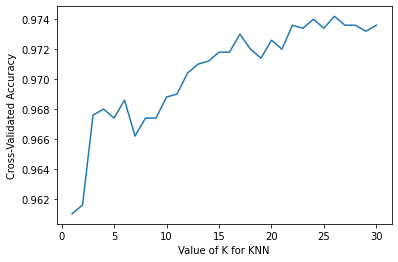

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')